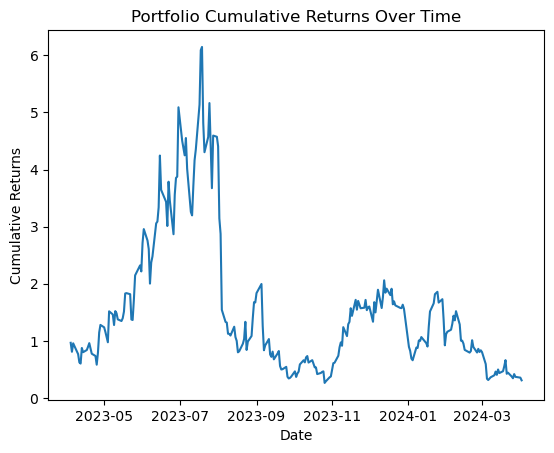

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

class StockPortfolio:
    def __init__(self):
        self.stocks = {}

    def add_stock(self, symbol, quantity, purchase_price):
        self.stocks[symbol] = {'quantity': quantity, 'purchase_price': purchase_price}

    def get_portfolio_value(self):
        total_value = 0
        for symbol, info in self.stocks.items():
            stock = yf.Ticker(symbol)
            current_price = stock.history(period="1d")["Close"].iloc[-1]
            total_value += info['quantity'] * current_price
        return total_value

    def plot_cumulative_returns(self):
        # Calculate daily returns
        daily_returns = []
        for symbol, info in self.stocks.items():
            stock = yf.Ticker(symbol)
            historical_prices = stock.history(period="1y")["Close"]
            returns = historical_prices.pct_change().dropna()
            daily_returns.append(returns * info['quantity'])

        # Combine returns of all stocks
        combined_returns = sum(daily_returns)
        cumulative_returns = (1 + combined_returns).cumprod()

        # Plot
        plt.plot(cumulative_returns.index, cumulative_returns)
        plt.xlabel('Date')
        plt.ylabel('Cumulative Returns')
        plt.title('Portfolio Cumulative Returns Over Time')
        plt.show()

# Example usage
portfolio = StockPortfolio()
portfolio.add_stock('AAPL', 10, 150)  # 10 shares of Apple bought at $150 each
portfolio.add_stock('MSFT', 5, 200)   # 5 shares of Microsoft bought at $200 each
portfolio.plot_cumulative_returns()
